# Ch. 6 - Thick Tails in Higher Dimensions

In [2]:
import numpy as np
from pylab import show
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import metrics

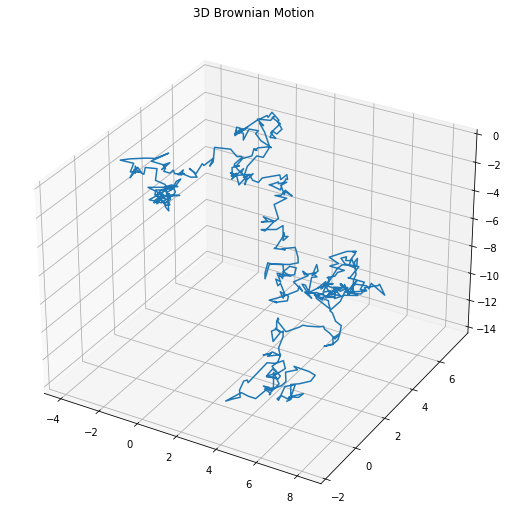

In [30]:
# taken from https://stackoverflow.com/questions/49781189/brownian-motion-3d-representation
def brownian(x0, n, dt, delta, out=None):

   #  n : The number of steps to take.
   #  dt : time step
   #  delta : "speed" of motion
   #  out :If `out` is NOT None, it specifies the array in which to put the
   #      result.  If `out` is None, a new numpy array is created and returned.
    x0 = np.asarray(x0) #I.C
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt)) #generate n numbers for sample
    if out is None: #create out array
        out = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=out) #cumulative sum for random variables
    out += np.expand_dims(x0, axis=-1)#initial condition.
    return out

def main():

    fig = plt.figure(1, figsize=(30,30)) #prepare plot

    ax = fig.add_subplot(2, 3, 3, projection='3d')

    delta = 2 # The Wiener process parameter.
    T = 10.0
    N = 500# Number of steps.
    dt = T/N
    m = 5 # Number of "lines"
    x = np.empty((m,N+1))# Create an empty array to store the realizations.
    x[:, 0] =  0# Initial values of x.

    brownian(x[:,0], N, dt, delta, out=x[:,1:]) 

    xdata, ydata, zdata = x[:3,:]
    ax.plot3D(xdata, ydata, zdata)
    ax.set_title('3D Brownian Motion')

    show()
    return
main()

In [31]:
# TODO: plot 3-D levy process, like pg 104

In [10]:
x = list(range(-10,11))
y = [x**2 for x in x]
z = x
a = [1]*21

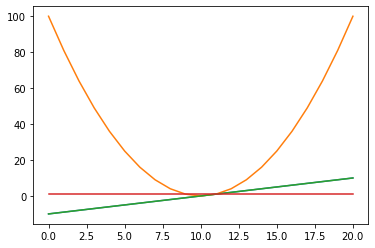

In [15]:
plt.plot(x)
plt.plot(y)
plt.plot(z)
plt.plot(a)

In [22]:
np.corrcoef(x,z)[0][1]

1.0

In [24]:
np.round(np.corrcoef(x,y)[0][1])

-0.0

In [34]:
metrics.mutual_info_score(x,a)

0.0

In [35]:
metrics.mutual_info_score(x,z)

3.044522437723422

In [36]:
metrics.mutual_info_score(x,y)

2.3843822657615705

In [37]:
# Here we see linear correlation found no correlation between x and y,
# even though y is very dependent on x (it's literally x^2)
# But mutual information does find some information on y based off x

In [23]:
# Section 6.5
def randMatrixNormal(n):
    mats = []
    for i in range(0, n):
        row = []
        for i in range(0, n):
            r = np.random.normal(0, 1, 1)[0]
            row.append(r)
        mats.append(row)
    return (mats+np.transpose(mats))/2

def randMatrixStudentT(n, df):
    mats = []
    for i in range(0, n):
        row = []
        for i in range(0, n):
            r = np.random.standard_t(df, 1)[0]
            row.append(r)
        mats.append(row)
    return (mats+np.transpose(mats))/2

In [22]:
randMatrixNormal(3)

array([[-0.60859957, -0.55708   ,  0.07372417],
       [-0.55708   ,  0.37646952, -0.48392478],
       [ 0.07372417, -0.48392478,  0.04417175]])

In [24]:
randMatrixStudentT(3, 2)

array([[-4.1388584 ,  0.38574882, -2.43613283],
       [ 0.38574882, -1.24922209, -0.38365961],
       [-2.43613283, -0.38365961, -1.1473505 ]])

In [39]:
normal, _ = np.linalg.eig(randMatrixNormal(1000))
student, _ = np.linalg.eig(randMatrixStudentT(1000, 2))
cauchy, _ = np.linalg.eig(randMatrixStudentT(1000, 1))

In [43]:
# replicate figure 6.8

(array([ 54.,  89., 109., 121., 124., 127., 119., 109.,  91.,  57.]),
 array([-44.54940216, -35.67772828, -26.80605441, -17.93438053,
         -9.06270665,  -0.19103278,   8.6806411 ,  17.55231498,
         26.42398885,  35.29566273,  44.16733661]),
 <BarContainer object of 10 artists>)

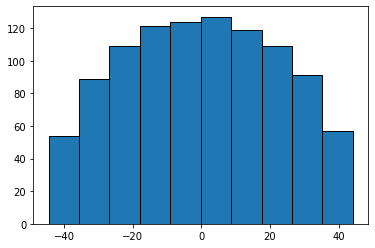

In [44]:
plt.hist(normal, edgecolor='black')

(array([  3.,   1.,   3.,  73., 418., 423.,  72.,   3.,   1.,   3.]),
 array([-5.21902431e+02, -4.17554439e+02, -3.13206448e+02, -2.08858456e+02,
        -1.04510465e+02, -1.62473231e-01,  1.04185518e+02,  2.08533510e+02,
         3.12881501e+02,  4.17229493e+02,  5.21577484e+02]),
 <BarContainer object of 10 artists>)

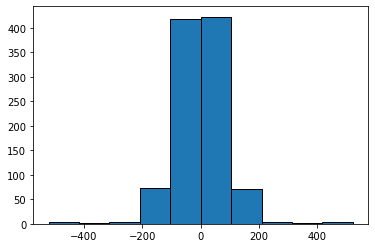

In [45]:
plt.hist(student, edgecolor='black')

(array([  1.,   0.,   3.,   4., 487., 497.,   4.,   3.,   0.,   1.]),
 array([-1.73559189e+05, -1.38849224e+05, -1.04139260e+05, -6.94292957e+04,
        -3.47193314e+04, -9.36702503e+00,  3.47005973e+04,  6.94105617e+04,
         1.04120526e+05,  1.38830490e+05,  1.73540455e+05]),
 <BarContainer object of 10 artists>)

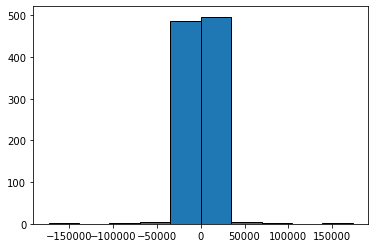

In [46]:
plt.hist(cauchy, edgecolor='black')

In [1]:
# Section 6.7

In [5]:
def sampleCauchy(n, a, b):
    X = list(range(1, n))
    E = np.random.standard_cauchy(n)
    Y = []
    for x, e in zip(X, E):
        y = a*x+b+e
        Y.append(y)
    return X,Y

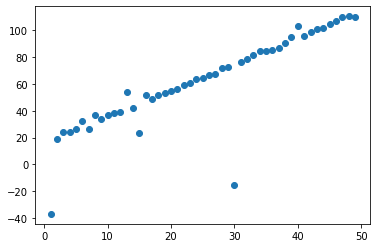

In [12]:
xx = sampleCauchy(50, 2, 15)
plt.plot(xx[0], xx[1], 'o')

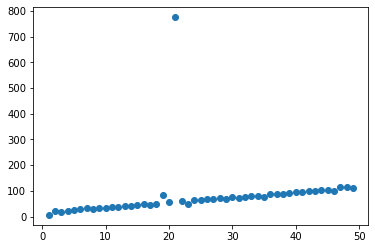

In [13]:
xx = sampleCauchy(50, 2, 15)
plt.plot(xx[0], xx[1], 'o')

It can look correlated, but then there'll be one big spike/outlier

In [14]:
# ch 6 appendix